<a href="https://colab.research.google.com/github/shamsudduhasami/Machine-Learning-Course-Project/blob/main/Project_Machine_Learning_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [10]:
# Define the raw URL for the Excel file
file_path = "https://raw.githubusercontent.com/shamsudduhasami/Machine-Learning-Course-Project/main/1_Project_Raw_Data.xlsx"

# Read the Excel file, specifying the sheet name that contains your raw data
df_raw = pd.read_excel(file_path, sheet_name="SoVI_Vars_County_2020_Raw")

# Display the first few rows to verify successful loading
print(df_raw.head())

   GEOID                     NAME  B01001_003E  B01001_003M  B01001_020E  \
0   1001  Autauga County, Alabama         1727         78.0          429   
1   1003  Baldwin County, Alabama         6082         72.0         2762   
2   1005  Barbour County, Alabama          660         29.0          301   
3   1007     Bibb County, Alabama          626         89.0          212   
4   1009   Blount County, Alabama         1844         89.0          476   

   B01001_020M  B01001_021E  B01001_021M  B01001_022E  B01001_022M  ...  \
0          141          699          208         1077          200  ...   
1          459         3855          406         6007          456  ...   
2           74          327           76          674           87  ...   
3          124          457          143          388          104  ...   
4          137         1073          247         1297          224  ...   

   DP04_0117M  DP04_0124E  DP04_0124M  DP04_0136E  DP04_0136M  DP04_0142E  \
0         483  

In [11]:
# Create a new DataFrame for computed variables
df_computed = df_raw[['GEOID', 'NAME']].copy()

# ---------------------------
# Compute Variables
# These variables are computed based on the SOVI documentation
# ---------------------------

# QASIAN: Percent of population identifying as Asian alone or in combination
df_computed["QASIAN"] = 100 * df_raw["B02011_001E"] / df_raw["B01003_001E"]

# QBLACK: Percent of population identifying as Black alone or in combination
df_computed["QBLACK"] = 100 * df_raw["B02009_001E"] / df_raw["B01003_001E"]

# QHISP: Percent of population identifying as Hispanic or Latinx
df_computed["QHISP"] = 100 * df_raw["B03003_003E"] / df_raw["B01003_001E"]

# QNATAM: Percent of population identifying as Native American alone or in combination
df_computed["QNATAM"] = 100 * df_raw["B02010_001E"] / df_raw["B01003_001E"]

# QAGEDEP: Percent of population under 5 years old or 65 years old and over
# Sum the numerator columns first
age_dep_numerators = [
    "B01001_003E", "B01001_020E", "B01001_021E", "B01001_022E", "B01001_023E",
    "B01001_024E", "B01001_025E", "B01001_027E", "B01001_044E", "B01001_045E",
    "B01001_046E", "B01001_047E", "B01001_048E", "B01001_049E"
]
df_computed["QAGEDEP"] = 100 * df_raw[age_dep_numerators].sum(axis=1) / df_raw["B01003_001E"]

# QFAM: Percent of children (under 18) living in 2-parent families
df_computed["QFAM"] = 100 * (df_raw["B23008_003E"] + df_raw["B23008_016E"]) / df_raw["B23008_001E"]

# MEDAGE: Median age (directly from ACS)
df_computed["MEDAGE"] = df_raw["B01002_001E"]

# QSSBEN: Percent of households receiving social security benefits
df_computed["QSSBEN"] = 100 * df_raw["B19055_002E"] / df_raw["B19055_001E"]

# QPOVTY: Percent of population living below the poverty threshold
df_computed["QPOVTY"] = 100 * df_raw["B17020_002E"] / df_raw["B17020_001E"]

# QRICH: Percent of households earning over $200,000 annually
df_computed["QRICH"] = 100 * df_raw["B19001_017E"] / df_raw["B19001_001E"]

# PCINCOME: Per capita income (directly from ACS)
df_computed["PCINCOME"] = df_raw["B19301_001E"]

# QESL: Percent of population speaking English as a second language with limited English proficiency
df_computed["QESL"] = 100 * df_raw[["C16001_005E", "C16001_008E", "C16001_011E", "C16001_014E",
                                    "C16001_017E", "C16001_020E", "C16001_023E", "C16001_026E",
                                    "C16001_029E", "C16001_032E", "C16001_035E", "C16001_038E"]].sum(axis=1) / df_raw["C16001_001E"]

# QFEMALE: Percent of population identifying as female
df_computed["QFEMALE"] = 100 * df_raw["B01001_026E"] / df_raw["B01003_001E"]

# QFHH: Percent of households with female householder, no spouse present
df_computed["QFHH"] = 100 * df_raw["B11001_006E"] / df_raw["B11001_001E"]

# NHRES1K: Nursing home residents per 1000 total population
df_computed["NHRES1K"] = (df_raw["P5_005N"] * 1000) / df_raw["P1_001N"]

# HOSP100K: Hospitals per 100,000 total population
df_computed["HOSP100K"] = (df_raw["HIFLD_Hospital_Count"] * 100000) / df_raw["B01003_001E"]

# QNOHLTH: Percent of population without health insurance
df_computed["QNOHLTH"] = 100 * df_raw[["B27001_005E", "B27001_008E", "B27001_011E", "B27001_014E",
                                       "B27001_017E", "B27001_020E", "B27001_023E", "B27001_026E",
                                       "B27001_029E", "B27001_033E", "B27001_036E", "B27001_039E",
                                       "B27001_042E", "B27001_045E", "B27001_048E", "B27001_051E",
                                       "B27001_054E", "B27001_057E"]].sum(axis=1) / df_raw["B27001_001E"]

# QED12LES: Percent of population with less than 12th grade education
df_computed["QED12LES"] = 100 * df_raw[["B15003_002E", "B15003_003E", "B15003_004E", "B15003_005E",
                                        "B15003_006E", "B15003_007E", "B15003_008E", "B15003_009E",
                                        "B15003_010E", "B15003_011E", "B15003_012E", "B15003_013E",
                                        "B15003_014E", "B15003_015E", "B15003_016E"]].sum(axis=1) / df_raw["B15003_001E"]

# QCVLUN: Percent of civilian unemployment
df_computed["QCVLUN"] = 100 * df_raw["B23025_005E"] / df_raw["B23025_003E"]

# PPUNIT: Population per Occupied Housing Unit
df_computed["PPUNIT"] = df_raw["B25033_001E"] / df_raw["B25003_001E"]

# QRENTER: Percent of households that are renters
df_computed["QRENTER"] = 100 * df_raw["B25003_003E"] / df_raw["B25003_001E"]

# MDHSEVAL: Median housing value (direct value)
df_computed["MDHSEVAL"] = df_raw["B25077_001E"]

# MDGRENT: Median gross rent (direct value)
df_computed["MDGRENT"] = df_raw["B25064_001E"]

# QMOHO: Percent of occupied housing units that are mobile homes
df_computed["QMOHO"] = 100 * (df_raw["B25032_011E"] + df_raw["B25032_022E"]) / df_raw["B25003_001E"]

# QEXTRCT: Percent of employed persons working in extractive industries
df_computed["QEXTRCT"] = 100 * df_raw["C24050_002E"] / df_raw["C24050_001E"]

# QSERV: Percent of employed persons working in the service industry
df_computed["QSERV"] = 100 * df_raw["C24050_029E"] / df_raw["C24050_001E"]

# QFEMLBR: Percent of female population participating in labor force
df_computed["QFEMLBR"] = 100 * df_raw[["B23001_090E", "B23001_097E", "B23001_104E", "B23001_111E",
                                       "B23001_118E", "B23001_125E", "B23001_132E", "B23001_139E",
                                       "B23001_146E", "B23001_153E", "B23001_160E", "B23001_165E",
                                       "B23001_170E"]].sum(axis=1) / df_raw["B23001_088E"]

# QNOAUTO: Percent of occupied housing units without a car or vehicle
df_computed["QNOAUTO"] = 100 * df_raw["B08201_002E"] / df_raw["B08201_001E"]

# QUNOCCHU: Percent of housing units that are not occupied
df_computed["QUNOCCHU"] = 100 * (df_raw["B25024_001E"] - df_raw["B25003_001E"]) / df_raw["B25024_001E"]

# QHSEBRDN: Percent of households spending more than 35% of income on housing expenses
df_computed["QHSEBRDN"] = 100 * (df_raw["DP04_0115E"] + df_raw["DP04_0124E"] + df_raw["DP04_0142E"]) / \
                         (df_raw["DP04_0110E"] + df_raw["DP04_0117E"] + df_raw["DP04_0136E"])


# Now, let's display the first few rows of the computed DataFrame to verify
pd.set_option('display.max_columns', None)
print(df_computed.head())

   GEOID                     NAME    QASIAN     QBLACK     QHISP    QNATAM  \
0   1001  Autauga County, Alabama  1.883571  20.530563  2.877478  0.803393   
1   1003  Baldwin County, Alabama  1.429298   9.334873  4.556803  1.533288   
2   1005  Barbour County, Alabama  0.619356  48.509550  4.435387  1.258691   
3   1007     Bibb County, Alabama  0.299455  22.700456  2.681684  0.402253   
4   1009   Blount County, Alabama  0.498658   1.901134  9.284045  1.378236   

     QAGEDEP       QFAM  MEDAGE     QSSBEN     QPOVTY     QRICH  PCINCOME  \
0  21.073348  69.632861    38.6  34.876386  15.211758  4.165314     29804   
1  25.963745  76.126380    43.2  39.602841   9.173677  6.617726     33751   
2  24.410613  41.283626    40.1  45.869985  28.599909  2.585282     20074   
3  22.030035  52.640343    39.9  42.099463  18.098130  2.162832     22626   
4  24.044671  71.405388    41.0  37.425136  13.736062  2.735204     25457   

       QESL    QFEMALE       QFHH    NHRES1K  HOSP100K    QNOHLTH   

In [12]:
# Identify numeric columns and exclude columns like 'GEOID' and 'NAME'
numeric_cols = [col for col in df_computed.select_dtypes(include='number').columns if col not in ['GEOID', 'NAME']]

# For each numeric column, calculate the z-score and store it in a new column with prefix "Z"
for col in numeric_cols:
    df_computed['Z' + col] = (df_computed[col] - df_computed[col].mean()) / df_computed[col].std()

# Display the first few rows to verify new columns were added
pd.set_option('display.max_columns', None)
print(df_computed.head())


   GEOID                     NAME    QASIAN     QBLACK     QHISP    QNATAM  \
0   1001  Autauga County, Alabama  1.883571  20.530563  2.877478  0.803393   
1   1003  Baldwin County, Alabama  1.429298   9.334873  4.556803  1.533288   
2   1005  Barbour County, Alabama  0.619356  48.509550  4.435387  1.258691   
3   1007     Bibb County, Alabama  0.299455  22.700456  2.681684  0.402253   
4   1009   Blount County, Alabama  0.498658   1.901134  9.284045  1.378236   

     QAGEDEP       QFAM  MEDAGE     QSSBEN     QPOVTY     QRICH  PCINCOME  \
0  21.073348  69.632861    38.6  34.876386  15.211758  4.165314     29804   
1  25.963745  76.126380    43.2  39.602841   9.173677  6.617726     33751   
2  24.410613  41.283626    40.1  45.869985  28.599909  2.585282     20074   
3  22.030035  52.640343    39.9  42.099463  18.098130  2.162832     22626   
4  24.044671  71.405388    41.0  37.425136  13.736062  2.735204     25457   

       QESL    QFEMALE       QFHH    NHRES1K  HOSP100K    QNOHLTH   

In [17]:
# Dataset are saved both in excel and csv in the directory for further analysis

# Save the DataFrame to an Excel file in the Colab environment
df_computed.to_excel("Project_Processed_Data.xlsx", index=False)

# Use files.download to download the file to your local computer
files.download("Project_Processed_Data.xlsx")

# Save the DataFrame to an Csv file in the Colab environment
df_computed.to_csv("Project_Processed_Data.csv", index=False)

# Use files.download to download the file to your local computer
files.download("Project_Processed_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# Print column indices with names for df_computed
for idx, col in enumerate(df_computed.columns):
    print(idx, col)

0 GEOID
1 NAME
2 QASIAN
3 QBLACK
4 QHISP
5 QNATAM
6 QAGEDEP
7 QFAM
8 MEDAGE
9 QSSBEN
10 QPOVTY
11 QRICH
12 PCINCOME
13 QESL
14 QFEMALE
15 QFHH
16 NHRES1K
17 HOSP100K
18 QNOHLTH
19 QED12LES
20 QCVLUN
21 PPUNIT
22 QRENTER
23 MDHSEVAL
24 MDGRENT
25 QMOHO
26 QEXTRCT
27 QSERV
28 QFEMLBR
29 QNOAUTO
30 QUNOCCHU
31 QHSEBRDN
32 ZQASIAN
33 ZQBLACK
34 ZQHISP
35 ZQNATAM
36 ZQAGEDEP
37 ZQFAM
38 ZMEDAGE
39 ZQSSBEN
40 ZQPOVTY
41 ZQRICH
42 ZPCINCOME
43 ZQESL
44 ZQFEMALE
45 ZQFHH
46 ZNHRES1K
47 ZHOSP100K
48 ZQNOHLTH
49 ZQED12LES
50 ZQCVLUN
51 ZPPUNIT
52 ZQRENTER
53 ZMDHSEVAL
54 ZMDGRENT
55 ZQMOHO
56 ZQEXTRCT
57 ZQSERV
58 ZQFEMLBR
59 ZQNOAUTO
60 ZQUNOCCHU
61 ZQHSEBRDN


In [14]:
# Create a list of the names of the 30 standardized input social vulnerability variables.
svi_columns = df_computed.columns[32:62]

# Verify that these columns exist in df_computed (print any missing ones)
missing_cols = [col for col in svi_columns if col not in df_computed.columns]
if missing_cols:
    print("Warning, these columns are missing:", missing_cols)
else:
    print("All variables are present for PCA.")

# Create a new DataFrame with only the social vulnerability variables
svi_df = df_computed[svi_columns].dropna()
print(svi_df.head())

All variables are present for PCA.
    ZQASIAN   ZQBLACK    ZQHISP   ZQNATAM  ZQAGEDEP     ZQFAM   ZMEDAGE  \
0  0.032879  0.708220 -0.482744 -0.271291 -0.929575  0.272696 -0.550926   
1 -0.128439 -0.052176 -0.362592 -0.170307  0.214617  0.830127  0.291640   
2 -0.416060  2.608516 -0.371279 -0.208298 -0.148765 -2.160921 -0.276176   
3 -0.529661  0.855597 -0.496752 -0.326790 -0.705742 -1.186013 -0.312809   
4 -0.458921 -0.557066 -0.024370 -0.191759 -0.234383  0.424857 -0.111326   

    ZQSSBEN   ZQPOVTY    ZQRICH  ZPCINCOME     ZQESL  ZQFEMALE     ZQFHH  \
0 -0.369400  0.093688  0.022951   0.113844 -0.434385  0.590861  0.643180   
1  0.260923 -0.883782  0.712970   0.676316 -0.318582  0.636782 -0.518191   
2  1.096713  2.261020 -0.421612  -1.272741 -0.100682 -1.028978  2.189876   
3  0.593874  0.560947 -0.540474  -0.909065 -0.396671 -1.505928  1.282040   
4 -0.029497 -0.145204 -0.379430  -0.505630  0.007871  0.167407 -0.145664   

   ZNHRES1K  ZHOSP100K  ZQNOHLTH  ZQED12LES   ZQCVLUN   Z

In [15]:
# Compute the correlation matrix
correlation_matrix = svi_df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Compute the covariance matrix
covariance_matrix = svi_df.cov()
print("Covariance Matrix:")
print(covariance_matrix)

Correlation Matrix:
            ZQASIAN   ZQBLACK    ZQHISP   ZQNATAM  ZQAGEDEP     ZQFAM  \
ZQASIAN    1.000000  0.043436  0.172336 -0.051375 -0.337950  0.104263   
ZQBLACK    0.043436  1.000000 -0.107821 -0.122455 -0.213229 -0.630037   
ZQHISP     0.172336 -0.107821  1.000000 -0.003535 -0.210125 -0.082758   
ZQNATAM   -0.051375 -0.122455 -0.003535  1.000000 -0.023941 -0.185758   
ZQAGEDEP  -0.337950 -0.213229 -0.210125 -0.023941  1.000000  0.091518   
ZQFAM      0.104263 -0.630037 -0.082758 -0.185758  0.091518  1.000000   
ZMEDAGE   -0.270387 -0.186210 -0.321576 -0.132511  0.850714  0.115254   
ZQSSBEN   -0.419523 -0.015137 -0.234183 -0.027200  0.762000 -0.168545   
ZQPOVTY   -0.195039  0.426926  0.082034  0.249601 -0.067017 -0.655911   
ZQRICH     0.659367 -0.045202  0.103764 -0.067364 -0.266949  0.277408   
ZPCINCOME  0.507905 -0.207284 -0.060522 -0.152858 -0.050214  0.426638   
ZQESL      0.397099 -0.026606  0.816166 -0.018195 -0.299450 -0.042454   
ZQFEMALE   0.080438  0.121423 -

In [16]:
# Display with background gradient
correlation_matrix.style.background_gradient(cmap='PuBu', low=0, high=0, axis=0, subset=None, vmin=-1, vmax=1, text_color_threshold=0)

,ZQASIAN,ZQBLACK,ZQHISP,ZQNATAM,ZQAGEDEP,ZQFAM,ZMEDAGE,ZQSSBEN,ZQPOVTY,ZQRICH,ZPCINCOME,ZQESL,ZQFEMALE,ZQFHH,ZNHRES1K,ZHOSP100K,ZQNOHLTH,ZQED12LES,ZQCVLUN,ZPPUNIT,ZQRENTER,ZMDHSEVAL,ZMDGRENT,ZQMOHO,ZQEXTRCT,ZQSERV,ZQFEMLBR,ZQNOAUTO,ZQUNOCCHU,ZQHSEBRDN
ZQASIAN,1.000000,0.043436,0.172336,-0.051375,-0.337950,0.104263,-0.270387,-0.419523,-0.195039,0.659367,0.507905,0.397099,0.080438,0.015223,-0.187758,-0.151303,-0.153927,-0.169113,-0.015573,0.184976,0.369192,0.656424,0.698966,-0.306001,-0.243543,-0.068864,0.333596,0.150987,-0.316729,0.397703
ZQBLACK,0.043436,1.000000,-0.107821,-0.122455,-0.213229,-0.630037,-0.186210,-0.015137,0.426926,-0.045202,-0.207284,-0.026606,0.121423,0.690899,-0.062404,-0.120205,0.155384,0.303461,0.384142,0.069391,0.335041,-0.094985,0.038502,0.265716,-0.231429,0.166500,-0.122079,0.377710,-0.031583,0.384526
ZQHISP,0.172336,-0.107821,1.000000,-0.003535,-0.210125,-0.082758,-0.321576,-0.234183,0.082034,0.103764,-0.060522,0.816166,-0.149228,0.151988,-0.193095,0.001687,0.412160,0.421548,0.067239,0.459821,0.228435,0.120426,0.213332,0.021546,0.206275,0.146525,0.008657,0.002551,-0.016851,0.150567
ZQNATAM,-0.051375,-0.122455,-0.003535,1.000000,-0.023941,-0.185758,-0.132511,-0.027200,0.249601,-0.067364,-0.152858,-0.018195,-0.023620,0.198170,-0.055464,0.094965,0.316336,0.009916,0.248771,0.248742,0.091291,-0.065079,-0.111950,0.072278,0.100059,0.156096,-0.054413,0.060932,0.109093,-0.042836
ZQAGEDEP,-0.337950,-0.213229,-0.210125,-0.023941,1.000000,0.091518,0.850714,0.762000,-0.067017,-0.266949,-0.050214,-0.299450,0.111575,-0.332390,0.262607,0.255662,-0.078324,-0.129525,-0.098887,-0.540759,-0.435503,-0.208431,-0.367074,0.091023,0.273236,0.060400,-0.408734,-0.108998,0.528568,-0.233437
ZQFAM,0.104263,-0.630037,-0.082758,-0.185758,0.091518,1.000000,0.115254,-0.168545,-0.655911,0.277408,0.426638,-0.042454,-0.116050,-0.802886,0.074860,0.132661,-0.252038,-0.442349,-0.539222,-0.075908,-0.347336,0.253800,0.157997,-0.342365,0.245116,-0.389367,0.280368,-0.449145,-0.076376,-0.334109
ZMEDAGE,-0.270387,-0.186210,-0.321576,-0.132511,0.850714,0.115254,1.000000,0.742381,-0.188622,-0.121117,0.102484,-0.370069,0.030141,-0.351844,0.161452,0.123384,-0.218686,-0.186477,-0.119071,-0.587417,-0.555848,-0.074293,-0.219578,0.117711,0.108077,0.018406,-0.345871,-0.150589,0.489443,-0.208949
ZQSSBEN,-0.419523,-0.015137,-0.234183,-0.027200,0.762000,-0.168545,0.742381,1.000000,0.241449,-0.435531,-0.368183,-0.334044,-0.022099,-0.042870,0.103119,0.035668,0.008073,0.188174,0.187928,-0.368888,-0.430953,-0.346096,-0.469557,0.408536,0.042049,0.244006,-0.685681,0.026683,0.544703,-0.151568
ZQPOVTY,-0.195039,0.426926,0.082034,0.249601,-0.067017,-0.655911,-0.188622,0.241449,1.000000,-0.445530,-0.686288,0.046882,0.035586,0.616253,-0.032981,-0.008767,0.394889,0.614804,0.583789,0.131761,0.351491,-0.412299,-0.404662,0.515943,-0.012865,0.383302,-0.550011,0.451105,0.204945,0.282344
ZQRICH,0.659367,-0.045202,0.103764,-0.067364,-0.266949,0.277408,-0.121117,-0.435531,-0.445530,1.000000,0.855962,0.253798,0.096456,-0.144113,-0.176472,-0.132613,-0.205160,-0.340436,-0.180791,0.187547,0.097197,0.803838,0.804084,-0.395168,-0.187529,-0.212304,0.446141,-0.037206,-0.265241,0.247685


Using PCA we can specify how many components we want to keep after the analysis. But how do we know how many to keep? There is a way to retain only components that have eigenvalues of at least 1. Eigenvalues represent magnitudes of how much variance each component captures in the input data.
Thus, larger eigenvalues indicate components that we might want to retain. The rule to use a threshold of ≥1 for eigenvalues to keep is known as the Kaiser Rule or Kaiser Criterion. Since there are 7 components that have eigenvalue more than 1, I will retain 7 components for this analysis.

Although all the data processing was done in Colab, the Principal Component Analysis (PCA) was conducted using the principal() function from the R psych package rather than the Python's scikit-learn library. This is because the R version of PCA includes features like rotation and more detailed output that make it easier to understand the patterns in the data. In particular, the rotated results help group related variables together, making the components more meaningful and easier to interpret. Since the focus of this study was to identify and interpret underlying patterns in the data not just reduce dimensions the R-based PCA method was more suitable.

In [17]:
## These values are from the PCA analysis run in RStudio

# create a dataframe for loading
data = {
    "Variable": ["ZQASIAN", "ZQBLACK", "ZQHISP", "ZQNATAM", "ZQAGEDEP", "ZQFAM", "ZMEDAGE", "ZQSSBEN", "ZQPOVTY", "ZQRICH",
                 "ZPCINCOME", "ZQESL", "ZQFEMALE", "ZQFHH", "ZNHRES1K", "ZHOSP100K", "ZQNOHLTH", "ZQED12LES", "ZQCVLUN",
                 "ZPPUNIT", "ZQRENTER", "ZMDHSEVAL", "ZMDGRENT", "ZQMOHO", "ZQEXTRCT", "ZQSERV", "ZQFEMLBR", "ZQNOAUTO",
                 "ZQUNOCCHU", "ZQHSEBRDN"],
    "RC1": [0.74, -0.10, 0.15, -0.06, -0.09, 0.24, 0.01, -0.34, -0.45, 0.86, 0.84, 0.30, 0.19, -0.18, -0.21, -0.11, -0.25, -0.43, -0.16, 0.03, 0.23, 0.90, 0.87, -0.50, -0.22, -0.05, 0.45, 0.06, -0.16, 0.47],
    "RC2": [0.14, 0.70, 0.02, 0.10, -0.15, -0.79, -0.21, 0.07, 0.70, -0.13, -0.32, 0.09, 0.24, 0.77, -0.01, -0.11, 0.18, 0.38, 0.60, -0.01, 0.63, -0.05, 0.01, 0.21, -0.33, 0.49, -0.23, 0.72, -0.01, 0.65],
    "RC4": [-0.23, -0.08, -0.11, -0.04, 0.85, -0.04, 0.86, 0.86, 0.08, -0.15, -0.06, -0.17, 0.02, -0.18, 0.03, 0.09, 0.03, 0.08, 0.10, -0.39, -0.43, -0.05, -0.20, 0.33, 0.15, 0.22, -0.62, -0.03, 0.70, -0.06],
    "RC3": [0.13, 0.00, 0.84, 0.00, -0.16, -0.06, -0.28, -0.11, 0.20, 0.05, -0.20, 0.83, -0.17, 0.21, -0.20, 0.06, 0.63, 0.69, 0.10, 0.60, 0.13, 0.04, 0.11, 0.27, 0.35, 0.03, -0.24, 0.00, 0.09, 0.04],
    "RC5": [-0.07, -0.15, 0.04, 0.07, 0.31, 0.13, 0.08, -0.08, -0.04, -0.11, 0.03, 0.05, 0.09, -0.21, 0.62, 0.74, 0.02, -0.11, -0.27, -0.37, 0.21, -0.19, -0.26, -0.34, 0.57, -0.09, 0.17, 0.13, 0.10, -0.13],
    "RC6": [-0.07, -0.18, -0.05, 0.92, -0.04, -0.10, -0.14, -0.06, 0.22, 0.01, -0.09, -0.10, 0.04, 0.13, -0.15, 0.14, 0.40, -0.09, 0.31, 0.36, 0.00, 0.01, -0.05, 0.08, 0.12, 0.18, -0.04, -0.05, 0.20, -0.05],
    "RC7": [0.00, 0.27, -0.20, -0.05, 0.05, -0.09, 0.06, -0.02, -0.04, 0.18, 0.14, -0.13, 0.69, 0.23, 0.14, 0.03, 0.07, 0.02, 0.01, 0.17, -0.25, -0.04, 0.03, 0.07, -0.10, -0.53, -0.04, -0.07, -0.24, -0.15]
}

# Create a DataFrame from the data dictionary
pca_loadings = pd.DataFrame(data)

# Convert from Wide to Long Format for Heatmap
pca_long = pd.melt(pca_loadings, id_vars=["Variable"], var_name="Component", value_name="Loading")
print("Long format PCA loadings:")
print(pca_long)

Long format PCA loadings:
      Variable Component  Loading
0      ZQASIAN       RC1     0.74
1      ZQBLACK       RC1    -0.10
2       ZQHISP       RC1     0.15
3      ZQNATAM       RC1    -0.06
4     ZQAGEDEP       RC1    -0.09
..         ...       ...      ...
205     ZQSERV       RC7    -0.53
206   ZQFEMLBR       RC7    -0.04
207   ZQNOAUTO       RC7    -0.07
208  ZQUNOCCHU       RC7    -0.24
209  ZQHSEBRDN       RC7    -0.15

[210 rows x 3 columns]


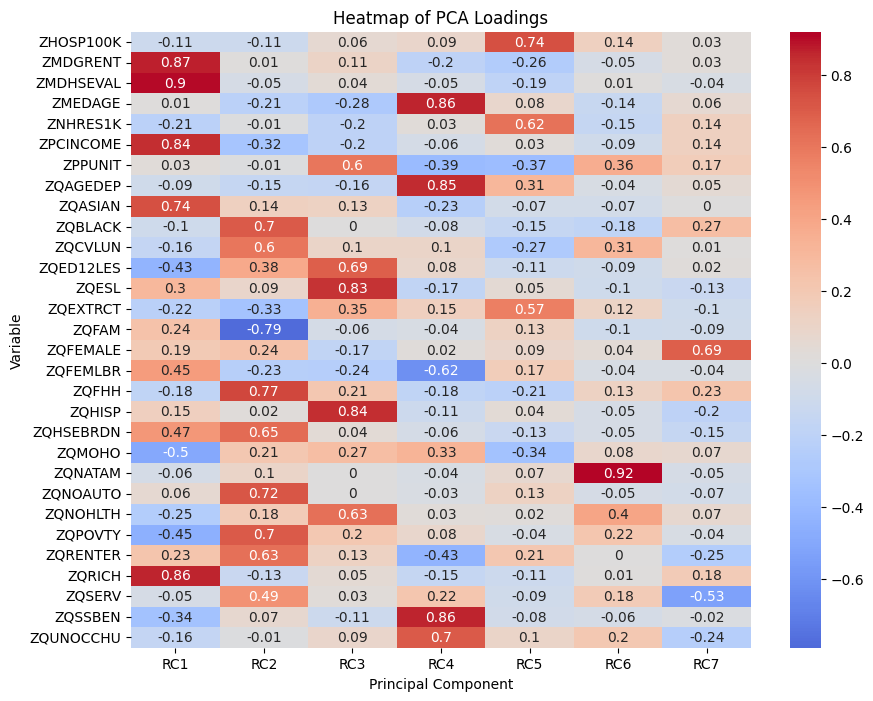

In [18]:
# Pivot the long dataframe to get a matrix with 'Variable' as rows and 'Component' as columns.
heatmap_data = pca_long.pivot(index='Variable', columns='Component', values='Loading')

# Plot the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title("Heatmap of PCA Loadings")
plt.xlabel("Principal Component")
plt.ylabel("Variable")
plt.show()

In [19]:
# Replace values that are between -0.6 and 0.6 with NA
# Filter the RC1 to RC7 columns.
cols_to_filter = ["RC1", "RC2", "RC4", "RC3", "RC5", "RC6", "RC7"]
pca_loadings_filtered = pca_loadings.copy()
pca_loadings_filtered[cols_to_filter] = pca_loadings_filtered[cols_to_filter].applymap(lambda x: x if abs(x) >= 0.6 else np.nan)

print("\nFiltered PCA loadings (values with absolute value < 0.6 are replaced with NA):")
print(pca_loadings_filtered)


Filtered PCA loadings (values with absolute value < 0.6 are replaced with NA):
     Variable   RC1   RC2   RC4   RC3   RC5   RC6   RC7
0     ZQASIAN  0.74   NaN   NaN   NaN   NaN   NaN   NaN
1     ZQBLACK   NaN  0.70   NaN   NaN   NaN   NaN   NaN
2      ZQHISP   NaN   NaN   NaN  0.84   NaN   NaN   NaN
3     ZQNATAM   NaN   NaN   NaN   NaN   NaN  0.92   NaN
4    ZQAGEDEP   NaN   NaN  0.85   NaN   NaN   NaN   NaN
5       ZQFAM   NaN -0.79   NaN   NaN   NaN   NaN   NaN
6     ZMEDAGE   NaN   NaN  0.86   NaN   NaN   NaN   NaN
7     ZQSSBEN   NaN   NaN  0.86   NaN   NaN   NaN   NaN
8     ZQPOVTY   NaN  0.70   NaN   NaN   NaN   NaN   NaN
9      ZQRICH  0.86   NaN   NaN   NaN   NaN   NaN   NaN
10  ZPCINCOME  0.84   NaN   NaN   NaN   NaN   NaN   NaN
11      ZQESL   NaN   NaN   NaN  0.83   NaN   NaN   NaN
12   ZQFEMALE   NaN   NaN   NaN   NaN   NaN   NaN  0.69
13      ZQFHH   NaN  0.77   NaN   NaN   NaN   NaN   NaN
14   ZNHRES1K   NaN   NaN   NaN   NaN  0.62   NaN   NaN
15  ZHOSP100K   NaN   Na

<ipython-input-19-568a10d7c776>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pca_loadings_filtered[cols_to_filter] = pca_loadings_filtered[cols_to_filter].applymap(lambda x: x if abs(x) >= 0.6 else np.nan)


In [21]:
# Define the PCA URL for the CSV file
file_path = "https://raw.githubusercontent.com/shamsudduhasami/Machine-Learning-Course-Project/main/3_Project_PCA_Analysis_Data.csv"

# Read the CSV file, specifying the sheet name that contains your raw data
PCA_data = pd.read_csv(file_path)

# Display the first few rows to verify successful loading
print(PCA_data.head())

   Unnamed: 0  GEOID                     NAME    QASIAN     QBLACK     QHISP  \
0           1   1001  Autauga County, Alabama  1.883571  20.530563  2.877478   
1           2   1003  Baldwin County, Alabama  1.429298   9.334873  4.556803   
2           3   1005  Barbour County, Alabama  0.619356  48.509550  4.435387   
3           4   1007     Bibb County, Alabama  0.299455  22.700456  2.681684   
4           5   1009   Blount County, Alabama  0.498658   1.901134  9.284045   

     QNATAM    QAGEDEP       QFAM  MEDAGE     QSSBEN     QPOVTY     QRICH  \
0  0.803393  21.073348  69.632861    38.6  34.876386  15.211758  4.165314   
1  1.533288  25.963745  76.126380    43.2  39.602841   9.173677  6.617726   
2  1.258691  24.410613  41.283626    40.1  45.869985  28.599909  2.585282   
3  0.402253  22.030035  52.640343    39.9  42.099463  18.098130  2.162832   
4  1.378236  24.044671  71.405388    41.0  37.425136  13.736062  2.735204   

   PCINCOME      QESL    QFEMALE       QFHH    NHRES1K  

In [22]:
# Print column indices with names for PCA_data
for idx, col in enumerate(PCA_data.columns):
    print(idx, col)

0 Unnamed: 0
1 GEOID
2 NAME
3 QASIAN
4 QBLACK
5 QHISP
6 QNATAM
7 QAGEDEP
8 QFAM
9 MEDAGE
10 QSSBEN
11 QPOVTY
12 QRICH
13 PCINCOME
14 QESL
15 QFEMALE
16 QFHH
17 NHRES1K
18 HOSP100K
19 QNOHLTH
20 QED12LES
21 QCVLUN
22 PPUNIT
23 QRENTER
24 MDHSEVAL
25 MDGRENT
26 QMOHO
27 QEXTRCT
28 QSERV
29 QFEMLBR
30 QNOAUTO
31 QUNOCCHU
32 QHSEBRDN
33 ZQASIAN
34 ZQBLACK
35 ZQHISP
36 ZQNATAM
37 ZQAGEDEP
38 ZQFAM
39 ZMEDAGE
40 ZQSSBEN
41 ZQPOVTY
42 ZQRICH
43 ZPCINCOME
44 ZQESL
45 ZQFEMALE
46 ZQFHH
47 ZNHRES1K
48 ZHOSP100K
49 ZQNOHLTH
50 ZQED12LES
51 ZQCVLUN
52 ZPPUNIT
53 ZQRENTER
54 ZMDHSEVAL
55 ZMDGRENT
56 ZQMOHO
57 ZQEXTRCT
58 ZQSERV
59 ZQFEMLBR
60 ZQNOAUTO
61 ZQUNOCCHU
62 ZQHSEBRDN
63 RC1
64 RC2
65 RC4
66 RC3
67 RC5
68 RC6
69 RC7


In [23]:
# Select the RC columns by name
rc_cols = ['RC1', 'RC2', 'RC4', 'RC3', 'RC5', 'RC6', 'RC7']
rc_data = PCA_data[rc_cols]

# Apply Min-Max scaling
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(rc_data)

# Create new column names
scaled_col_names = [col + '_Standardized' for col in rc_cols]

# Add scaled values as new columns to the original DataFrame
for i, col in enumerate(scaled_col_names):
    PCA_data[col] = scaled_values[:, i]

# View the result
print(PCA_data[[*rc_cols, *scaled_col_names]].head())
print(PCA_data.head())

        RC1       RC2       RC4       RC3       RC5       RC6       RC7  \
0 -0.099317 -0.013798 -0.572875 -0.254820 -0.967419 -0.438247  0.973133   
1  0.676759 -0.612276  0.575885 -0.161918 -0.751781  0.193080  0.490896   
2 -1.090809  2.094692  0.216351  0.298056 -0.275741 -0.910825  0.033784   
3 -1.252831  0.361051 -0.123460  0.328734 -1.067164 -0.265852  0.266207   
4 -0.811809 -0.668672 -0.095757  0.506021 -1.094878 -0.277757  0.912651   

   RC1_Standardized  RC2_Standardized  RC4_Standardized  RC3_Standardized  \
0          0.218114          0.270683          0.265819          0.145418   
1          0.287612          0.211881          0.393019          0.156614   
2          0.129326          0.477849          0.353209          0.212045   
3          0.114817          0.307513          0.315582          0.215742   
4          0.154311          0.206340          0.318649          0.237107   

   RC5_Standardized  RC6_Standardized  RC7_Standardized  
0          0.171601         

In [24]:
# Function: Pad to 5 digits if length <= 4
def format_geoid(geoid):
    geoid_str = str(geoid)
    if len(geoid_str) <= 4:
        return geoid_str.zfill(5)  # Pad with zeros on the left
    else:
        return geoid_str

# Apply to DataFrame
PCA_data['GEOID_formatted'] = PCA_data['GEOID'].apply(format_geoid)

# Show the result
print(PCA_data)


      Unnamed: 0  GEOID                        NAME    QASIAN     QBLACK  \
0              1   1001     Autauga County, Alabama  1.883571  20.530563   
1              2   1003     Baldwin County, Alabama  1.429298   9.334873   
2              3   1005     Barbour County, Alabama  0.619356  48.509550   
3              4   1007        Bibb County, Alabama  0.299455  22.700456   
4              5   1009      Blount County, Alabama  0.498658   1.901134   
...          ...    ...                         ...       ...        ...   
3103        3104  56037  Sweetwater County, Wyoming  1.753091   1.736944   
3104        3105  56039       Teton County, Wyoming  2.029457   0.762117   
3105        3106  56041       Uinta County, Wyoming  0.623343   0.451556   
3106        3107  56043    Washakie County, Wyoming  0.075633   1.474852   
3107        3108  56045      Weston County, Wyoming  1.627773   2.492077   

          QHISP    QNATAM    QAGEDEP       QFAM  MEDAGE     QSSBEN     QPOVTY  \
0     

Since from the PCA analysis we got 7 components where RC1 and RC5 reduce the social vulnerability and the other 5 components increase the social vulneralibity, so I will compute the social vulnerability for each county using the equation in the code below.

In [25]:
# Calculating Social Vulnerability Index (SoVI) for each county in US
PCA_data['SoVI'] = (
    PCA_data['RC2_Standardized'] +
    PCA_data['RC3_Standardized'] +
    PCA_data['RC4_Standardized'] +
    PCA_data['RC6_Standardized'] +
    PCA_data['RC7_Standardized']
) - (
    PCA_data['RC1_Standardized'] +
    PCA_data['RC5_Standardized']
)

PCA_data.head()

,Unnamed: 0,GEOID,NAME,QASIAN,QBLACK,QHISP,QNATAM,QAGEDEP,QFAM,MEDAGE,QSSBEN,QPOVTY,QRICH,PCINCOME,QESL,QFEMALE,QFHH,NHRES1K,HOSP100K,QNOHLTH,QED12LES,QCVLUN,PPUNIT,QRENTER,MDHSEVAL,MDGRENT,QMOHO,QEXTRCT,QSERV,QFEMLBR,QNOAUTO,QUNOCCHU,QHSEBRDN,ZQASIAN,ZQBLACK,ZQHISP,ZQNATAM,ZQAGEDEP,ZQFAM,ZMEDAGE,ZQSSBEN,ZQPOVTY,ZQRICH,ZPCINCOME,ZQESL,ZQFEMALE,ZQFHH,ZNHRES1K,ZHOSP100K,ZQNOHLTH,ZQED12LES,ZQCVLUN,ZPPUNIT,ZQRENTER,ZMDHSEVAL,ZMDGRENT,ZQMOHO,ZQEXTRCT,ZQSERV,ZQFEMLBR,ZQNOAUTO,ZQUNOCCHU,ZQHSEBRDN,RC1,RC2,RC4,RC3,RC5,RC6,RC7,RC1_Standardized,RC2_Standardized,RC4_Standardized,RC3_Standardized,RC5_Standardized,RC6_Standardized,RC7_Standardized,GEOID_formatted,SoVI
0,1,1001,"Autauga County, Alabama",1.883571,20.530563,2.877478,0.803393,21.073348,69.632861,38.6,34.876386,15.211758,4.165314,29804,1.274712,51.379428,13.646273,4.421393,1.797300,7.964732,11.286318,2.907252,2.553968,25.376873,161200.0,1011.0,16.786493,0.838080,15.309194,51.084233,5.413053,9.022239,20.869986,0.032879,0.708220,-0.482744,-0.271291,-0.929575,0.272696,-0.550926,-0.369400,0.093688,0.022951,0.113844,-0.434385,0.590861,0.643180,-0.533255,-0.453758,-0.299812,-0.190605,-0.895766,0.247093,-0.308428,0.011868,0.952147,0.536793,-0.769461,-0.631941,-0.435486,-0.166912,-0.862856,0.342697,-0.099317,-0.013798,-0.572875,-0.254820,-0.967419,-0.438247,0.973133,0.218114,0.270683,0.265819,0.145418,0.171601,0.113183,0.781002,01001,1.186389
1,2,1003,"Baldwin County, Alabama",1.429298,9.334873,4.556803,1.533288,25.963745,76.126380,43.2,39.602841,9.173677,6.617726,33751,1.809246,51.491372,8.677288,5.229390,1.832433,9.505770,9.528615,3.917506,2.562078,23.000226,211600.0,1032.0,10.573846,1.798153,17.265714,53.805085,3.125632,28.009285,20.035229,-0.128439,-0.052176,-0.362592,-0.170307,0.214617,0.830127,0.291640,0.260923,-0.883782,0.712970,0.676316,-0.318582,0.636782,-0.518191,-0.376343,-0.450028,0.006091,-0.481472,-0.494402,0.277701,-0.592978,0.518368,1.041514,-0.134065,-0.635563,-0.115273,-0.044392,-0.797496,0.873942,0.181060,0.676759,-0.612276,0.575885,-0.161918,-0.751781,0.193080,0.490896,0.287612,0.211881,0.393019,0.156614,0.194270,0.155506,0.729444,01003,1.164581
2,3,1005,"Barbour County, Alabama",0.619356,48.509550,4.435387,1.258691,24.410613,41.283626,40.1,45.869985,28.599909,2.585282,20074,2.815059,47.430672,20.263892,6.145185,3.995844,10.680051,25.268304,6.936725,2.372452,38.049775,86500.0,587.0,26.453551,5.742506,18.042954,48.566364,11.145677,22.683918,21.930031,-0.416060,2.608516,-0.371279,-0.208298,-0.148765,-2.160921,-0.276176,1.096713,2.261020,-0.421612,-1.272741,-0.100682,-1.028978,2.189876,-0.198496,-0.220356,0.239190,2.123157,0.705104,-0.437944,1.208867,-0.738837,-0.852206,1.580668,-0.085455,0.089978,-0.797403,1.413426,0.386816,0.547959,-1.090809,2.094692,0.216351,0.298056,-0.275741,-0.910825,0.033784,0.129326,0.477849,0.353209,0.212045,0.244314,0.081502,0.680572,01005,1.431536
3,4,1007,"Bibb County, Alabama",0.299455,22.700456,2.681684,0.402253,22.030035,52.640343,39.9,42.099463,18.098130,2.162832,22626,1.448795,46.267990,16.379667,10.541426,4.469473,9.051475,19.115531,7.435897,2.853974,25.223860,96400.0,693.0,27.731092,4.721185,16.427797,46.836627,6.626257,21.413879,17.080925,-0.529661,0.855597,-0.496752,-0.326790,-0.705742,-1.186013,-0.312809,0.593874,0.560947,-0.540474,-0.909065,-0.396671,-1.505928,1.282040,0.655249,-0.170075,-0.084089,1.104986,0.903420,1.379310,-0.326748,-0.639346,-0.401118,1.718620,-0.227896,-0.336546,-1.046035,0.167537,0.270642,-0.390996,-1.252831,0.361051,-0.123460,0.328734,-1.067164,-0.265852,0.266207,0.114817,0.307513,0.315582,0.215742,0.161116,0.124740,0.705421,01007,1.393066
4,5,1009,"Blount County, Alabama",0.498658,1.901134,9.284045,1.378236,24.044671,71.405388,41.0,37.425136,13.736062,2.735204,25457,3.316129,50.347156,10.271162,5.411438,1.731452,10.032475,17.174863,5.201544,2.697053,23.923603,135300.0,666.0,24.131101,1.655281,13.075845,46.386886,5.078991,13.108507,15.971868,-0.458921,-0.557066,-0.024370,-0.191759,-0.234383,0.424857,-0.111326

In [38]:
# Dataset are saved both in excel and csv in the directory for further analysis

# Save the DataFrame to an Excel file in the Colab environment
PCA_data.to_excel("PCA_data_processed.xlsx", index=False)

# Use files.download to download the file to your local computer
files.download("PCA_data_processed.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>